In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay

2024-12-15 12:21:58.582922: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [68]:
dirdata = '/Users/marcelloferreira/Desktop/DROPOUT/DATA'
os.chdir(dirdata)
os.getcwd()

'/Users/marcelloferreira/Desktop/DROPOUT/DATA'

In [86]:
# Load the dataset
data = pd.read_csv("data.csv", delimiter=';')

In [87]:
# Filter the dataset to include only 'Dropout' and 'Graduate' in the target column
data = data[data['Target'].isin(['Dropout', 'Graduate'])]

In [88]:
# Select features and target column
features = [
    "Age at enrollment",
    "Admission grade",
    "Curricular units 1st sem (grade)",
    "Gender"
]
target = "Target"

# Encode the target variable
label_encoder = LabelEncoder()
data[target] = label_encoder.fit_transform(data[target])  # Encode "Dropout", "Graduate"

# Extract features (X) and target (y)
X = data[features]
y = data[target]

In [89]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the standardized features back to a DataFrame for easier interpretation
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first few rows of the standardized features and the binary target
#X_scaled_df.head(), y.head()

In [90]:
# Step 1: Split the Data into Training and Testing Sets

# Split the standardized features (X_scaled) and binary target (y) into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Check the shapes of the splits
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train shape: (2541, 4), X_test shape: (1089, 4)
y_train shape: (2541,), y_test shape: (1089,)


In [91]:
# Step 2: Define and Train the Neural Network

# Define the binary classification neural network
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # Input + first hidden layer
    Dropout(0.3),                                              # Dropout for regularization
    Dense(32, activation='relu'),                              # Second hidden layer
    Dropout(0.3),                                              # Dropout for regularization
    Dense(1, activation='sigmoid')                             # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy',  # Binary classification loss
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=32)

Epoch 1/30
64/64 [==============================] - 0s 2ms/step - loss: 0.6039 - accuracy: 0.7057 - val_loss: 0.5384 - val_accuracy: 0.7387
Epoch 2/30
64/64 [==============================] - 0s 1ms/step - loss: 0.5039 - accuracy: 0.7594 - val_loss: 0.5173 - val_accuracy: 0.7564
Epoch 3/30
64/64 [==============================] - 0s 1ms/step - loss: 0.4990 - accuracy: 0.7653 - val_loss: 0.5126 - val_accuracy: 0.7603
Epoch 4/30
64/64 [==============================] - 0s 1ms/step - loss: 0.4953 - accuracy: 0.7721 - val_loss: 0.5053 - val_accuracy: 0.7623
Epoch 5/30
64/64 [==============================] - 0s 1ms/step - loss: 0.4920 - accuracy: 0.7726 - val_loss: 0.5026 - val_accuracy: 0.7623
Epoch 6/30
64/64 [==============================] - 0s 1ms/step - loss: 0.4887 - accuracy: 0.7766 - val_loss: 0.5006 - val_accuracy: 0.7623
Epoch 7/30
64/64 [==============================] - 0s 1ms/step - loss: 0.4763 - accuracy: 0.7702 - val_loss: 0.4996 - val_accuracy: 0.7583
Epoch 8/30
64/64 [==

In [92]:
# Step 3 : Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

35/35 [==============================] - 0s 615us/step - loss: 0.4665 - accuracy: 0.7897
Test Loss: 0.4665, Test Accuracy: 0.7897


35/35 [==============================] - 0s 481us/step
              precision    recall  f1-score   support

     Dropout       0.81      0.58      0.68       414
    Graduate       0.78      0.92      0.84       675

    accuracy                           0.79      1089
   macro avg       0.80      0.75      0.76      1089
weighted avg       0.79      0.79      0.78      1089

ROC-AUC Score: 0.7495813204508855


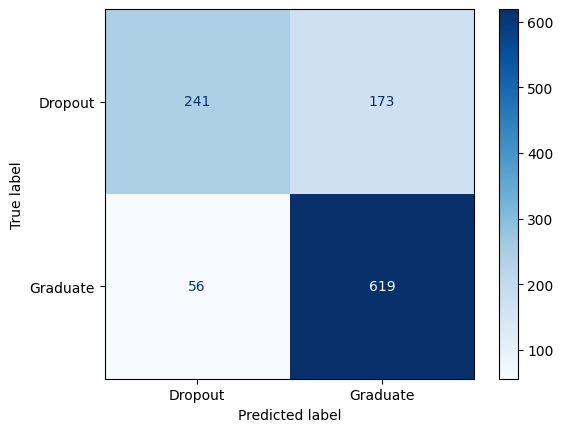

In [93]:
# Step 4 : Predict and Analyze

# Predict binary outcomes on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Classification report
print(classification_report(y_test, y_pred, target_names=['Dropout', 'Graduate']))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {roc_auc}")

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Dropout', 'Graduate'], cmap='Blues')
plt.show()

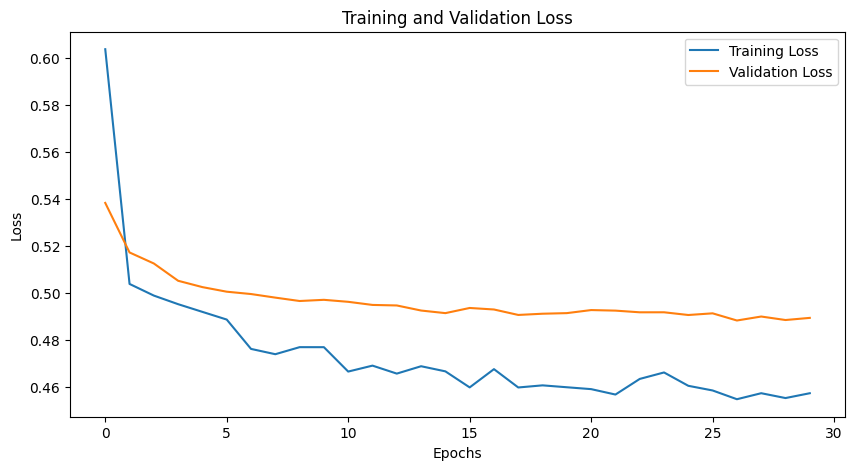

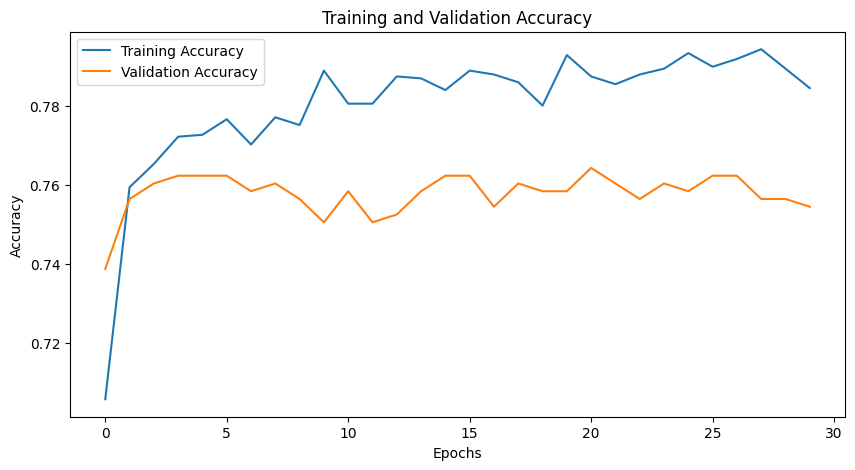

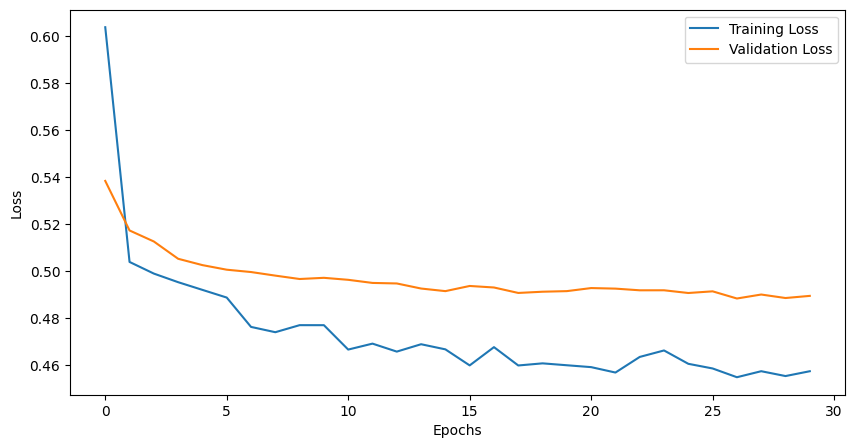

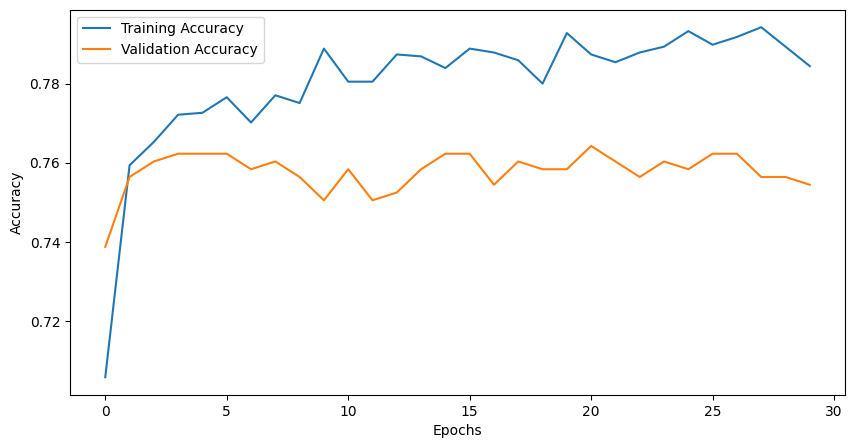

In [94]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
#plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# FIM

In [5]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert target to categorical (for neural network output)
y_categorical = to_categorical(y, num_classes=len(label_encoder.classes_))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_categorical, test_size=0.3, random_state=42, stratify=y
)

# Build the neural network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax')  # Output layer with softmax for multi-class classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=32, verbose=1)

# Evaluate the model
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)
y_test_labels = y_test.argmax(axis=1)

# Classification report
report = classification_report(y_test_labels, y_pred, target_names=label_encoder.classes_)
print(report)


Epoch 1/30
97/97 [==============================] - 1s 2ms/step - loss: 0.9592 - accuracy: 0.5646 - val_loss: 0.8692 - val_accuracy: 0.6152
Epoch 2/30
97/97 [==============================] - 0s 1ms/step - loss: 0.8848 - accuracy: 0.6140 - val_loss: 0.8557 - val_accuracy: 0.6242
Epoch 3/30
97/97 [==============================] - 0s 1ms/step - loss: 0.8684 - accuracy: 0.6253 - val_loss: 0.8533 - val_accuracy: 0.6318
Epoch 4/30
97/97 [==============================] - 0s 1ms/step - loss: 0.8645 - accuracy: 0.6250 - val_loss: 0.8486 - val_accuracy: 0.6303
Epoch 5/30
97/97 [==============================] - 0s 1ms/step - loss: 0.8481 - accuracy: 0.6308 - val_loss: 0.8461 - val_accuracy: 0.6325
Epoch 6/30
97/97 [==============================] - 0s 1ms/step - loss: 0.8459 - accuracy: 0.6376 - val_loss: 0.8445 - val_accuracy: 0.6310
Epoch 7/30
97/97 [==============================] - 0s 1ms/step - loss: 0.8511 - accuracy: 0.6370 - val_loss: 0.8434 - val_accuracy: 0.6340
Epoch 8/30
97/97 [==

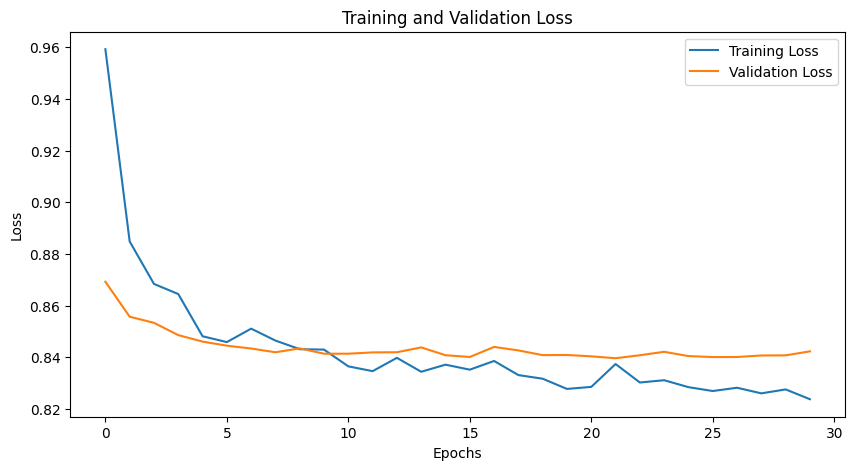

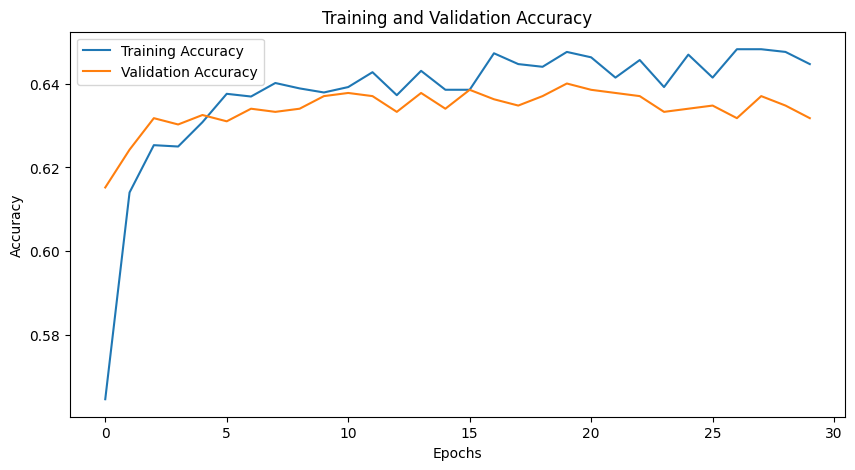

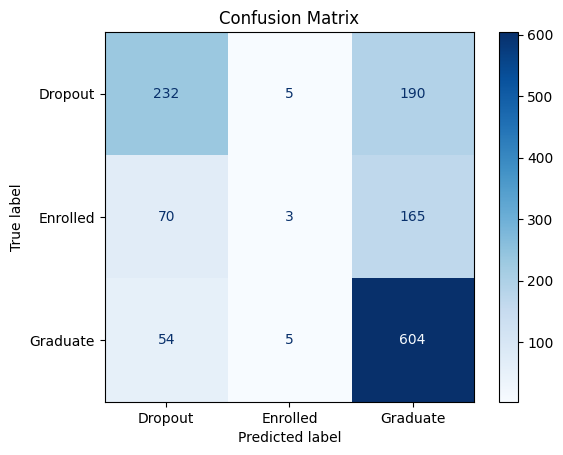

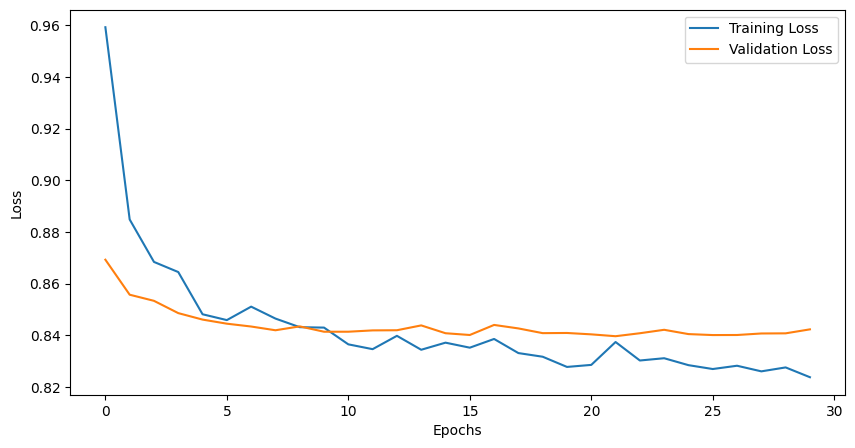

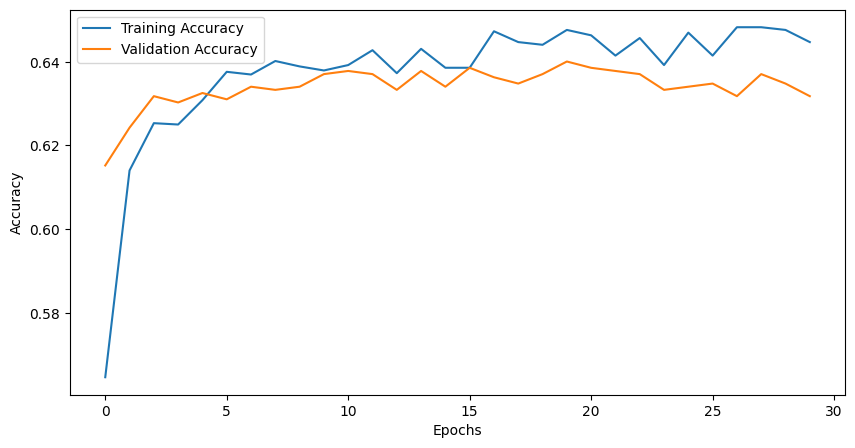

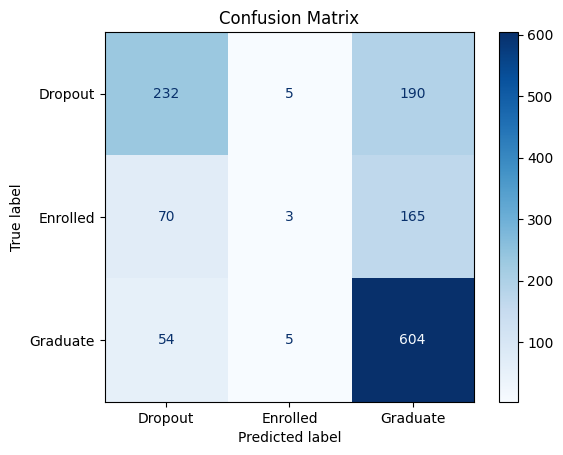

In [6]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test_labels, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
#plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test_labels, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()
